# Assignment 1a Notebook
This notebook will provide a series of tasks to guide you through the implementation of a random search algorithm. Conveniently, random search is often functionally equivalent to the random initialization step performed at the beginning of an evolutionary algorithm (EA). With that in mind, we'll try to structure this assignment so you can reuse your code throughout the course as you implement EA.

Start by evaluating the next cell to configure the notebook. If this is your first time using a Jupyter notebook, you can press `shift+enter` to execute the Python code in a selected cell.

In [ ]:
# Configure this notebook to automatically reload modules as they're modified
# https://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def plotMap(maze):
    '''A so-so map plotting function'''
    pltmaze = [[None for __ in range(len(maze))] for _ in range(len(maze[0]))]
    for y in range(len(maze[0])):
        for x in range(len(maze)):
            pltmaze[y][x] = 0 if maze[x][y]==1 else 1
    plt.matshow(pltmaze, origin='lower')
    plt.xticks(range(len(pltmaze[0])))
    plt.yticks(range(len(pltmaze)))
    plt.gca().set_xticks([x - 0.5 for x in plt.gca().get_xticks()][1:], minor='true')
    plt.gca().set_yticks([y - 0.5 for y in plt.gca().get_yticks()][1:], minor='true')
    plt.grid(which='minor')
    plt.show()

print('The first cell has been executed!')

## Fitness Function
This semester we'll be playing GPac: a game inspired by Mrs. Pac-Man with similar but simplified mechanics. There will be two assignment series in which you will generate maps and evolve GPac controllers respectively. In assignment series 1 (what you're doing now), your goal is to search for a harder map for a pre-defined Pac-Man controller. To make this assignment more about your ability to understand and implement search algorithms, we're providing you with an implementation of GPac with some stock agents. This is provided by a function that takes as input a flattened version of the map, the height and width dimensions of the map, and some optional parameters as documented in code of the function. This function forms the map, performs repair operations to make the map valid (more on this later in the class), and plays multiple games against an AI agent. This function then returns the negative average of Pac-Man's score and the log of the game closest to the mean game score. This means that a more challenging map for the provided agent will have a higher score (though it will be negative).

The following cell will evaluate a blank map and produce a score and log as described above:

In [ ]:
from fitness import repair_and_test_map
height, width = 20, 35
length = height*width
blank_map = [0 for _ in range(length)]
score, game_log = repair_and_test_map(blank_map, height, width)

game_log_path = 'worldFiles/notebooktest.txt'
with open(game_log_path, 'w') as f:
	[f.write(f'{line}\n') for line in game_log]

print(f"The map's score was {score} and the log was written to {game_log_path}")

You can now upload the file found at `worldFiles/notebooktest.txt` to [this visualizer](http://bonsai.auburn.edu/dtauritz/courses/ec/intro/2020fall/visualizer.html) to watch the game that was closest to the mean score.

## Random Initialization
Note that the representation of the map this function accepts is a little peculiar. In EA lingo we'd call this a fixed-length binary string (or something similar) and it's a classical representation EA work well with. This representation of a problem solution is also called a genotype. For this course, we're providing you with a partially-complete binary string genotype class for you to fill out.

As a first task, implement the `randomInitialization` method of the `binaryGenotype` class found in the `binaryGenotype.py` file and get the following function call to work. This function accepts a length input and should uniform randomly create a list of integer values `0` and `1` of the specified length and store this list in the gene member variable of the calling object (`self`). *You can ignore the other methods of the `binaryGenotype` class until assignment 1b.*

In [ ]:
from binaryGenotype import binaryGenotype
from fitness import translate_gene, repair_map

testSolution = binaryGenotype()
testSolution.randomInitialization(length=length)

print(f'The function did something? {testSolution.gene is not None}')
print(f'Was the solution the right length? {len(testSolution.gene) == length}')
print('The solution map looks like this:')
repaired_map, _ = repair_map(translate_gene(testSolution.gene, height, width))
plotMap(repaired_map)

anotherSolution = binaryGenotype()
anotherSolution.randomInitialization(length=length)

# This has a very small chance of failing for correct implementations
print(f'Was initialization actually random? {anotherSolution.gene != testSolution.gene}')

In [ ]:
# Now let's assign a fitness to your random solution
testSolution.fitness, testSolution.log = repair_and_test_map(testSolution.gene, height, width)

print(f'The fitness of the solution is {testSolution.fitness}')

If you feel so inclined, modify the above cell to print the log of your `testSolution` object to a file and watch it in the visualizer linked above!
### Fitness vs Score
You might have noticed that we switched from the term score to fitness in that last code block. We'll get into what fitness is in the lectures (if that hasn't already happened by the time you're reading this), but suffice to say for now that the fitness of our map is the same as the negative average Pac-Man score and we want to maximize fitness.

## Random Search Algorithm
At this point, you basically have everything you need to write a random search algorithm! Just write a loop to generate new random solutions, evaluate them, and keep track of the best solution seen so far.

In [ ]:
from math import inf
number_of_solutions = 2000
best_fitness = -inf
# Write your random search algorithm here and search through and evaluate 2000 random solutions


## Full Random Search Experiment
Using the code you wrote above, restart and run a random search with 2000 evaluations 30 times. For each of the 30 runs, record the highest fitness encountered during the run. This data will be used later for statistical analysis.

For the map with the highest fitness across all runs, same the game log to `worldFiles/bestRandom.txt`. Example code for accessing, saving, and writing this game log to a file can be found earlier in this notebook.

For the run that produced the highest fitness of all 30 runs, record data to produce a stairstep plot demonstrating the progress of this run as the search was performed. For reference, the stairstep plot should look something like the following:

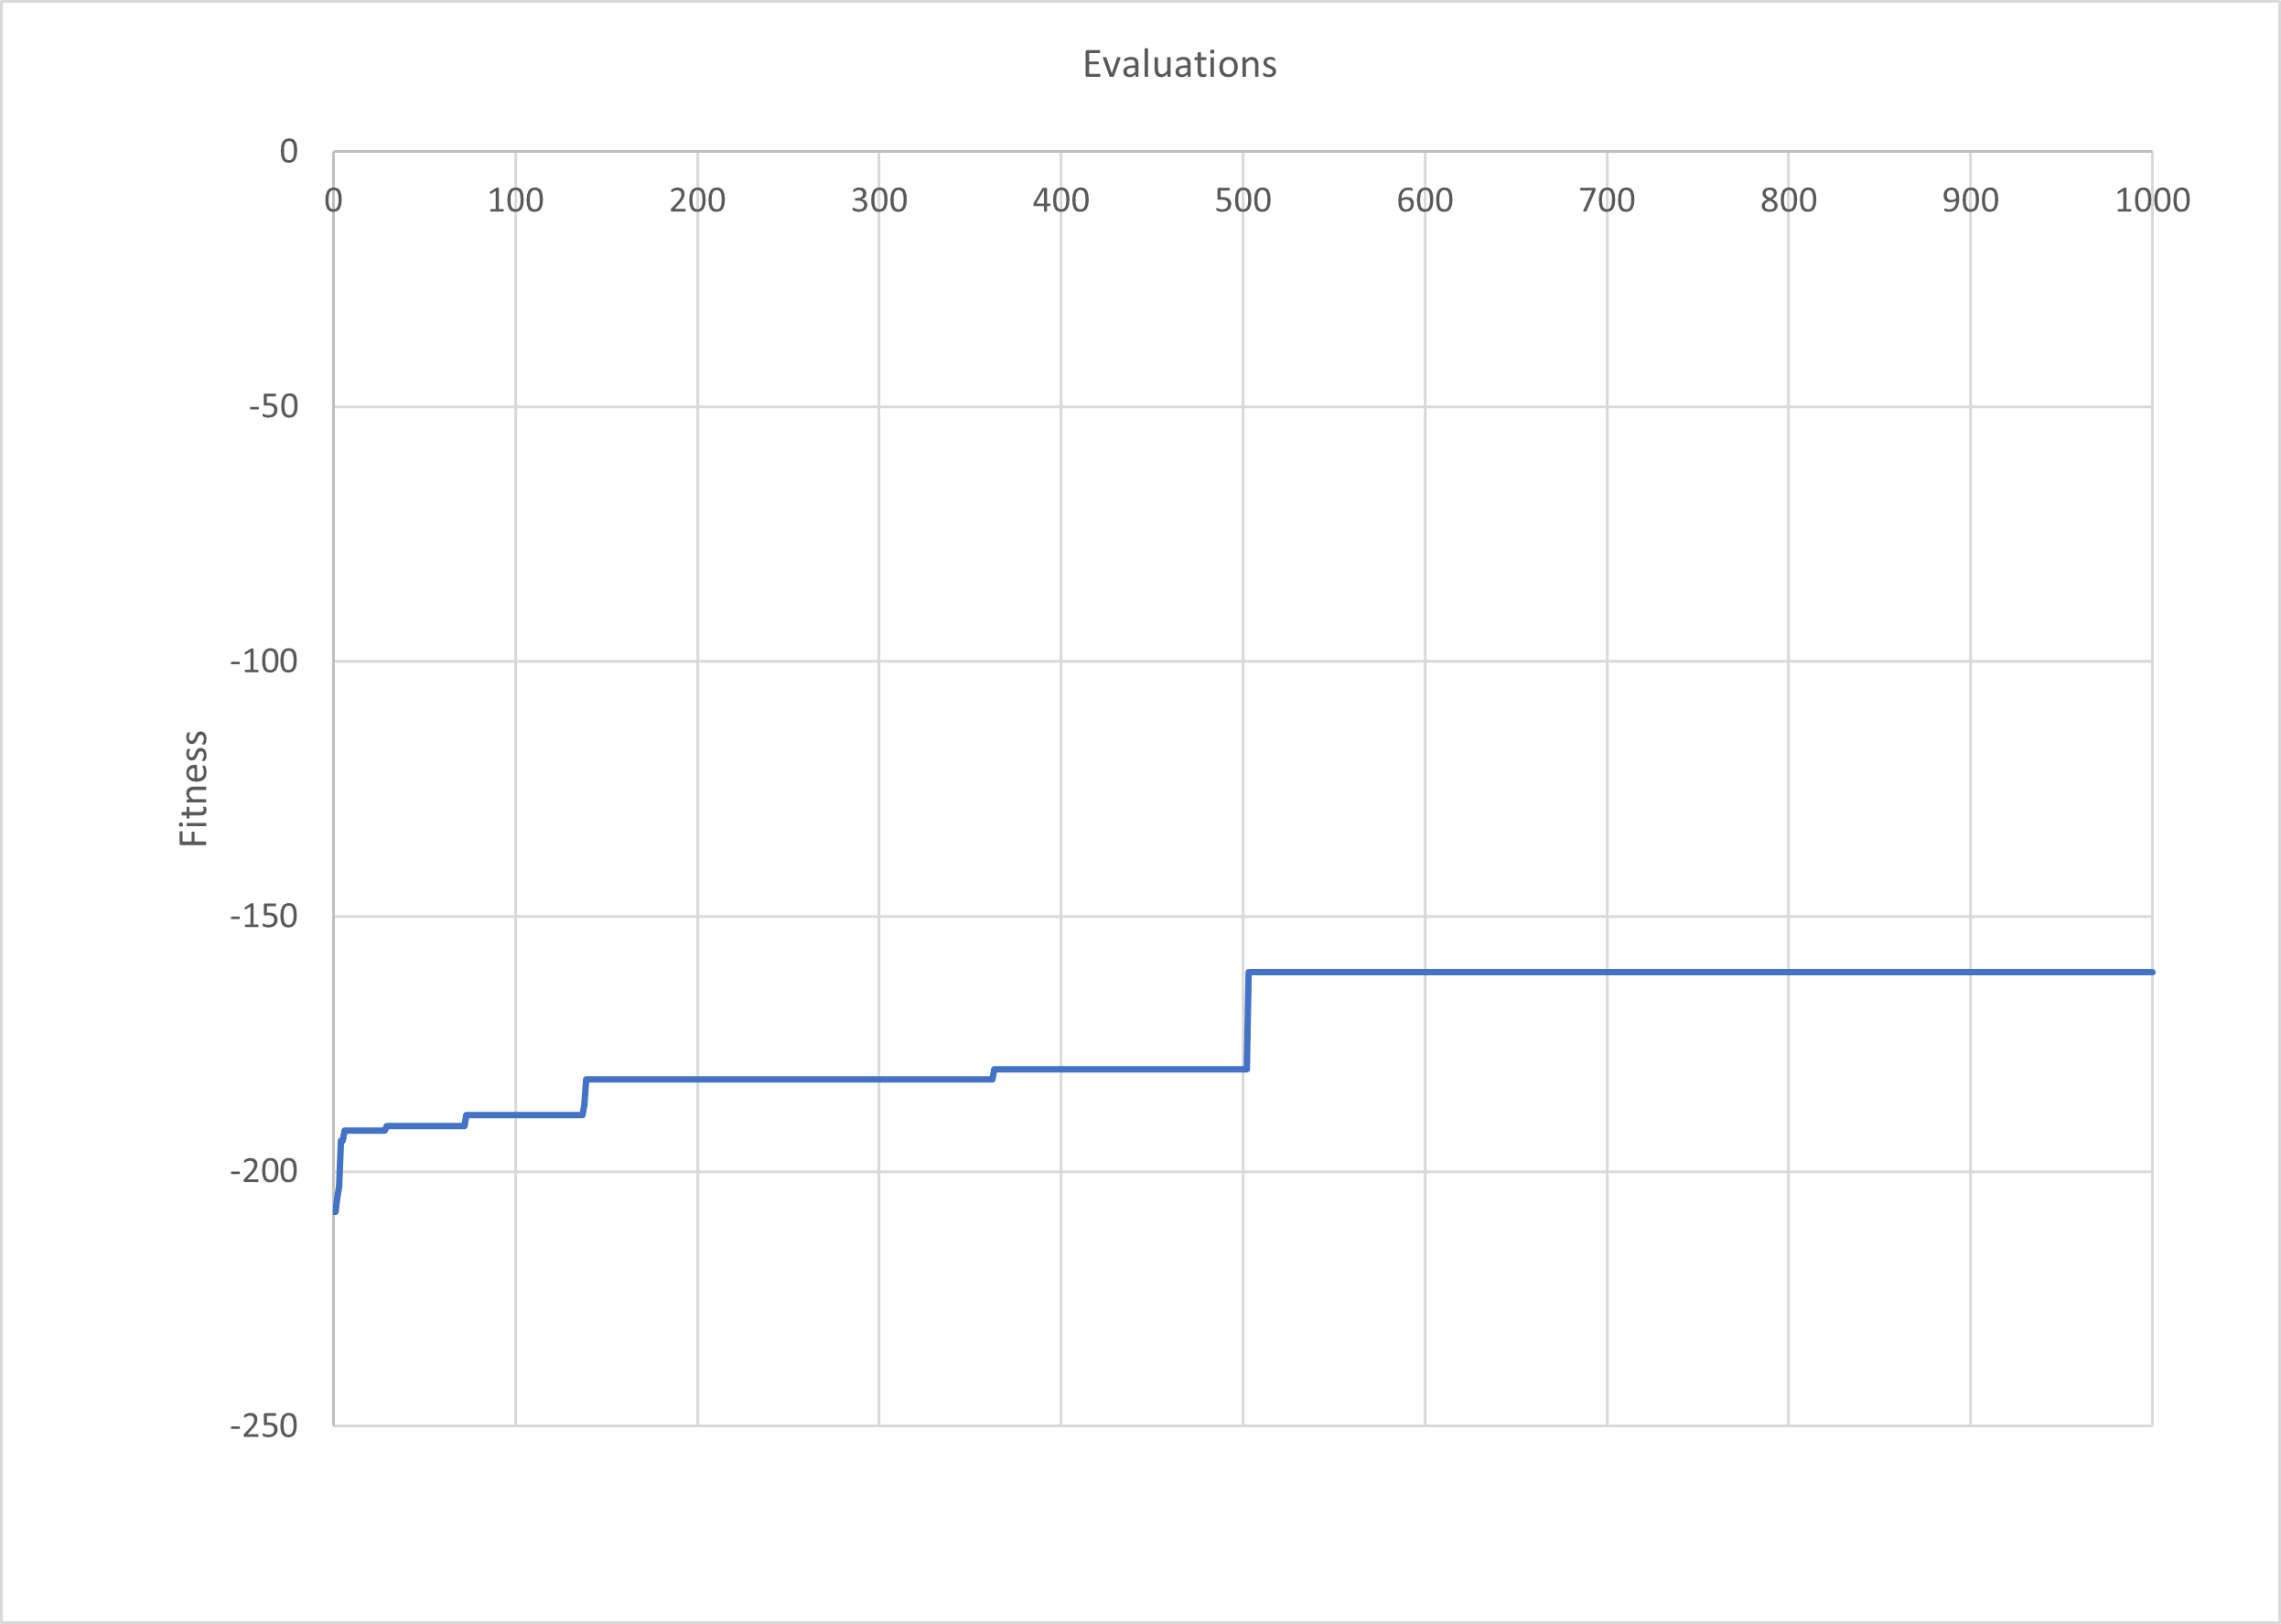

It is up to you to determine how to record and store (if necessary) the necessary metrics. You are also welcome to generate the stairstep graph using whatever software you like. You are even welcome to implement logging at the end of this notebook with `matplotlib`, though this is only one acceptable approach.

In [ ]:
number_of_runs = 30
solutions_per_run = 2000
world_log_filename = 'worldFiles/bestRandom.txt'
# Write your random search experiment here and record metrics as described above


## Report
Now that you've completed the implementation of random search, use the data you've generated to create the report requested in the assignment description document.